<a href="https://colab.research.google.com/github/Son-github/ML-chapter9_2/blob/main/chapter9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) #전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 500개의 단어를 선택

In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20]) #리뷰가 긍정인지 부정인지를 판단

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input]) #array안에 있는 원소들의 갯수를 돌아가면서 저장

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


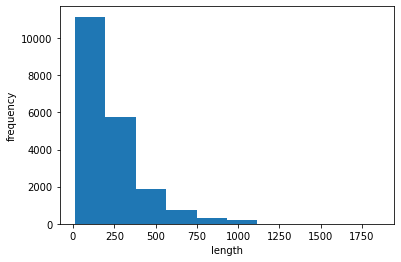

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) #pad_sequences() 함수는 시퀸스 데이터의 길이를 맞춰줌. 길이를 맞출 때, 앞 부분부터 짜르는데 그 이유는 뒷 부분의 정보가 더 유용하다고 생각하기 때문. 만약 뒷 부분을 잘라내고 싶다면 매개 변수의 값을 pre가 아닌 post로 바꾸어주면된다.

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) #SimpleRNN 사용. 활성화 함수의 기본값은 'tanh'임. input_shape의 500은 위 함수에서 500개의 단어만 사용하도록 지정했기 때문에 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0에서 499까지이기 때문에 원-핫 인코딩으로 표현을 하여도 배열의 길이가 500이어야한다.
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq) #원-핫 인코딩을 통해 정숫값에 있는 크기 속성을 없애고 각 정수를 교유하게 표현. keras.utils 아래에 있는 to_categorical() 함수는 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 리턴.

In [ ]:
print(train_oh.shape) #(20000, 100) 크기의 train_seq가 (20000, 100, 500)개로 바뀜
# 이렇게 샘플 데이터의 크기가 1차원 정수 배열 (100,)에서 2차원 배열(100, 500)으로 바뀌어야 하므로 SimpleRNN 클래스의 input_shape 매개변수의 값을 (100, 500)으로 지정

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary() #SimpleRNN에 전달할 샘플의 크기는 (100, 500)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력하기 때문에 출력 크기가 순환층의 뉴련 개수와 동일한 8.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) #기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도의 RMSprop 객체를 만들어 학습률 0.0001로 지정.
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6974 - accuracy: 0.4983 - val_loss: 0.6963 - val_accuracy: 0.5054
Epoch 2/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6949 - accuracy: 0.5060 - val_loss: 0.6950 - val_accuracy: 0.5100
Epoch 3/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6927 - accuracy: 0.5155 - val_loss: 0.6937 - val_accuracy: 0.5130
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6908 - accuracy: 0.5235 - val_loss: 0.6925 - val_accuracy: 0.5154
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6890 - accuracy: 0.5326 - val_loss: 0.6913 - val_accuracy: 0.5182
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6871 - accuracy: 0.5422 - val_loss: 0.6901 - val_accuracy: 0.5286
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6851 - accuracy: 0.5527 - val_loss: 0.6888 - val_ac

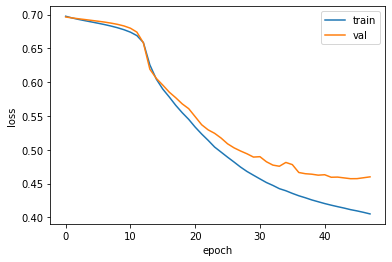

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes) #토큰 1개를 500차원으로 늘렸기 때문에 크기가 대략 500배 커짐.

8000000 4000000000


Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.6957 - accuracy: 0.5007 - val_loss: 0.6945 - val_accuracy: 0.5004
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6921 - accuracy: 0.5222 - val_loss: 0.6934 - val_accuracy: 0.5044
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6894 - accuracy: 0.5373 - val_loss: 0.6923 - val_accuracy: 0.5092
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6868 - accuracy: 0.5529 - val_loss: 0.6914 - val_accuracy: 0.5164
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6841 - accuracy: 0.5641 - val_loss: 0.6906 - val_accuracy: 0.5198
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6812 - accuracy: 0.5762 - val_loss: 0.6894 - val_accuracy: 0.5276
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6779 - accuracy: 0.5865 - val_loss: 0.6887 - val_accuracy:

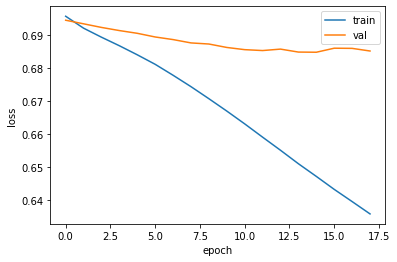

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100)) #순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법인 단어 임베딩임. 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있어 좋은 성능을 내는 경우가 많음. 단어 임베딩의 장점은 입력으로 정수 데이터를 받는 것.
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()